# Getting Started with GEDI L2B Version 2 Data in Python
### This tutorial demonstrates how to work with the Canopy Cover and Vertical Profile Metrics ([GEDI02_B.002](https://doi.org/10.5067/GEDI/GEDI02_B.002)) data product.
The Global Ecosystem Dynamics Investigation ([GEDI](https://lpdaac.usgs.gov/data/get-started-data/collection-overview/missions/gedi-overview/)) mission aims to characterize ecosystem structure and dynamics to enable radically improved quantification and understanding of the Earth's carbon cycle and biodiversity. The GEDI instrument produces high resolution laser ranging observations of the 3-dimensional structure of the Earth. GEDI is attached to the International Space Station and collects data globally between 51.6 N and 51.6 S latitudes at the highest resolution and densest sampling of any light detection and ranging (lidar) instrument in orbit to date. The Land Processes Distributed Active Archive Center (LP DAAC) distributes the GEDI Level 1 and Level 2 Version 1 and Version 2 products. The L1B and L2 GEDI products are archived and distributed in the HDF-EOS5 file format. 



## Use Case Example:  
This tutorial was developed using an example use case for a project being completed by the National Park Service. **The goal of the project is to use GEDI L2B Version 2 data to observe tree canopy height, cover, and profile over Redwood National Park in northern California.** 

This tutorial will show how to use Python to open GEDI L2B Version 2 files, visualize the sub-orbit of GEDI points (shots), subset to a region of interest, visualize GEDI canopy height and vertical profile metrics, and export subsets of GEDI science dataset (SDS) layers as GeoJSON files that can be loaded into GIS and/or Remote Sensing software programs. 

- [Redwood National Park GeoJSON](https://github.com/nasa/GEDI-Data-Resources/Additional_files/RedwoodNP.geojson)  
    - Contains the administrative boundary for Redwood National Park, available from: [Administrative Boundaries of National Park System Units 12/31/2017 - National Geospatial Data Asset (NGDA) NPS National Parks Dataset](https://irma.nps.gov/DataStore/DownloadFile/594958)

   
### Data Used in the Example:  
- **GEDI L2B Canopy Cover and Vertical Profile Metrics Data Global Footprint Level - [GEDI02_B.002](https://doi.org/10.5067/GEDI/GEDI02_B.002)**  
     - _The purpose of the L2B dataset is to extract biophysical metrics from each GEDI waveform. These metrics are based on the directional gap probability profile derived from the L1B waveform and include canopy cover, Plant Area Index (PAI), Plant Area Volume Density (PAVD) and Foliage Height Diversity (FHD)._   
     - **Science Dataset (SDS) layers:**
        - /geolocation/digital_elevation_model
        - /geolocation/elev_lowestmode  
        - /geolocation/elev_highestreturn  
        - /geolocation/lat_lowestmode  
        - /geolocation/lon_lowestmode  
        - /rh100  
        - /l2b_quality_flag  
        - /degrade_flag  
        - /sensitivity  
        - /pai  
        - /pavd_z  
        - /geolocation/shot_number  
        - /dz  
        - /selected_l2a_algorithm

# Topics Covered:
1. **Get Started**
    1.1 Import Packages    
    1.2 Set Up the Working Environment and Retrieve Files   
    1.3 Authentication      
2. **Search for GEDI Granules**  
3. **Import and Interpret Data**       
    3.1 Open a GEDI HDF5 File and Read File Metadata     
    3.2 Read SDS Metadata and Subset by Beam   
4. **Visualize a GEDI Sub-Orbit**    
    4.1 Subset by Layer and Create a Geodataframe   
    4.2 Visualize a Geodataframe
5. **Work with GEDI L2B Data**        
    5.1 Import and Extract PAVD   
    5.2 Visualize PAVD    
6. **Work with GEDI L2B Beam Transects**        
    6.1 Quality Filtering        
    6.2 Plot Beam Transects  
    6.3 Subset Beam Transects  
7. **Plot Profile Transects**      
    7.1 Plot PAVD Transects  
8. **Spatial Visualization**      
    8.1 Import, Subset, and Quality Filter all Beams  
    8.2 Spatial Subsetting  
    8.3 Visualize All Beams: Canopy Height, Elevation, and PAI  
9. **Export Subsets as GeoJSON Files**     

## Source Code used to Generate this Tutorial:
The repository containing all of the required files is located at: https://github.com/nasa/GEDI-Data-Resources      
  
<div class="alert alert-block alert-warning" >
<b>NOTE:</b> This tutorial was developed for GEDI L2B Version 2 HDF-EOS5 files and should only be used for that product. </div>   


# 1. Get Started <a id="getstarted"></a>

## 1.1 Import Packages <a id="1.1"></a>
#### Import the required packages and set the input/working directory to run this Jupyter Notebook locally.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
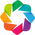

In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
import geoviews as gv
from geoviews import opts, tile_sources as gvts
import holoviews as hv
gv.extension('bokeh', 'matplotlib')
import shapely
import earthaccess
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

## 1.2 Set Up the Working Environment and Retrieve Files<a id="1.2"></a>
#### The input directory is defined as the current working directory. 

In [2]:
inDir = os.getcwd()   # Set input directory to the current working directory
os.chdir(inDir)
data_dir = inDir.rsplit('2023-ssc')[0] + 'shared/2023SSC/'
data_dir

'/home/jovyan/shared/2023SSC/'

## 1.3 Authentication
Login to your NASA Earthdata account and create a .netrc file using the login function from the earthaccess library. If you do not have an Earthdata Account, you can create one here.


In [3]:
# authenticate
earthaccess.login()

EARTHDATA_USERNAME and EARTHDATA_PASSWORD are not set in the current environment, try setting them or use a different strategy (netrc, interactive)
You're now authenticated with NASA Earthdata Login
Using token with expiration date: 12/24/2023
Using .netrc file for EDL


# 2. Search for GEDI Granules 

#### Below, `earthaccess` library is used to find GEDI L2B V2 Granules for an area of interest and a temporal range. The .h5 file will be downloaded to the `data` folder. You will need to download the files in order to execute this tutorial.  


In [4]:
# Define query parameters
conceptID = ["C1908350066-LPDAAC_ECS"]
bbx = (-91.5,18,-89,19)  # Lower lon, lower lat, upper lon, upper lat
tempRange = ('2022-06-01', '2022-06-30')
# search 
results = earthaccess.search_data(
    # short_name = 'GEDI02_B'
    concept_id = conceptID, 
    bounding_box = bbx,      
    temporal=tempRange,
    count=500
)
# download
downloaded_files = earthaccess.download(
    results,
    local_path= f'{data_dir}',  # Update the directory only to avoid overwritting by attendees 
)

Granules found: 5
 Getting 5 granules, approx download size: 1.59 GB


QUEUEING TASKS | :   0%|          | 0/5 [00:00<?, ?it/s]

File GEDI02_B_2022154163608_O19677_02_T01836_02_003_01_V002.h5 already downloaded
File GEDI02_B_2022155015315_O19683_03_T05652_02_003_01_V002.h5 already downloaded
File GEDI02_B_2022158145957_O19738_02_T03565_02_003_01_V002.h5 already downloaded
File GEDI02_B_2022162224038_O19805_03_T06723_02_003_02_V002.h5 already downloaded
File GEDI02_B_2022159001702_O19744_03_T08957_02_003_01_V002.h5 already downloaded


PROCESSING TASKS | :   0%|          | 0/5 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
gediFiles = [g for g in os.listdir(data_dir) if g.startswith('GEDI02_B') and g.endswith('.h5')]  # List all GEDI L2B .h5 files in inDir
gediFiles

['GEDI02_B_2022155015315_O19683_03_T05652_02_003_01_V002.h5',
 'GEDI02_B_2022159001702_O19744_03_T08957_02_003_01_V002.h5',
 'GEDI02_B_2022158145957_O19738_02_T03565_02_003_01_V002.h5',
 'GEDI02_B_2022154163608_O19677_02_T01836_02_003_01_V002.h5',
 'GEDI02_B_2022162224038_O19805_03_T06723_02_003_02_V002.h5']


# 3. Import and Interpret Data <a id="importinterpret"></a>

## 3.1 Open a GEDI HDF5 File and Read File Metadata <a id="2.1"></a>
#### Read the file using `h5py`. 

In [6]:
L2B = f'{data_dir}{gediFiles[0]}'
L2B

'/home/jovyan/shared/2023SSC/GEDI02_B_2022155015315_O19683_03_T05652_02_003_01_V002.h5'

#### The standard format  for GEDI Version 2 filenames is as follows:
> **GEDI02_B**: Product Short Name    
**2022159001702**: Julian Date and Time of Acquisition (YYYYDDDHHMMSS)  
**O19744**: Orbit Number   
**03**: Sub-Orbit Granule Number (1-4)  
**T08957**: Track Number (Reference Ground Track)   
**02**: Positioning and Pointing Determination System (PPDS) type (00 is predict, 01 rapid, 02 and higher is final)  
**003**: PGE Version Number    
**01**: Granule Production Version  
**V002**: Product Version  

#### Read in a GEDI HDF5 file using the `h5py` package.

In [7]:
gediL2B = h5py.File(L2B, 'r')  # Read file using h5py

#### Navigate the HDF5 file below. 

In [8]:
list(gediL2B.keys())

['BEAM0000',
 'BEAM0001',
 'BEAM0010',
 'BEAM0011',
 'BEAM0101',
 'BEAM0110',
 'BEAM1000',
 'BEAM1011',
 'METADATA']

#### The GEDI HDF5 file contains groups in which data and metadata are stored.
#### First, the `METADATA` group contains the file-level metadata.

In [9]:
list(gediL2B['METADATA'])

['DatasetIdentification']

This contains useful information such as the creation date, PGEVersion, and VersionID. Below, print the file-level metadata attributes.

In [10]:
for g in gediL2B['METADATA']['DatasetIdentification'].attrs:
    print(g, ": ", gediL2B['METADATA']['DatasetIdentification'].attrs[g]) 

PGEVersion :  003
VersionID :  01
abstract :  The GEDI L2B standard data product contains precise latitude, longitude, elevation, height, cover and vertical profile metrics for each laser footprint located on the land surface.
characterSet :  utf8
creationDate :  2022-09-22T17:38:15.690108Z
credit :  The software that generates the L2B product was implemented within the GEDI Science Data Processing System at the NASA Goddard Space Flight Center (GSFC) in Greenbelt, Maryland in collaboration with the Department of Geographical Sciences at the University of Maryland (UMD).
fileName :  GEDI02_B_2022155015315_O19683_03_T05652_02_003_01_V002.h5
language :  eng
originatorOrganizationName :  UMD/GSFC GEDI-SDPS > GEDI Science Data Processing System
purpose :  The purpose of the L2B dataset is to extract biophysical metrics from each GEDI waveform. These metrics are based on the directional gap probability profile derived from the L1B waveform and include canopy cover, Plant Area Index (PAI), P

## 3.2 Read SDS Metadata and Subset by Beam <a id="2.2"></a>

####  The GEDI instrument consists of 3 lasers producing a total of 8 beam ground transects. The eight remaining groups contain data for each of the eight GEDI beam transects. For additional information, be sure to check out: https://gedi.umd.edu/instrument/specifications/.

In [11]:
beamNames = [g for g in gediL2B.keys() if g.startswith('BEAM')]
beamNames

['BEAM0000',
 'BEAM0001',
 'BEAM0010',
 'BEAM0011',
 'BEAM0101',
 'BEAM0110',
 'BEAM1000',
 'BEAM1011']

#### One useful piece of metadata to retrieve from each beam transect is whether it is a full power beam or a coverage beam. 

In [12]:
for b in beamNames: 
    print(f"{b} is a {gediL2B[b].attrs['description']}")

BEAM0000 is a Coverage beam
BEAM0001 is a Coverage beam
BEAM0010 is a Coverage beam
BEAM0011 is a Coverage beam
BEAM0101 is a Full power beam
BEAM0110 is a Full power beam
BEAM1000 is a Full power beam
BEAM1011 is a Full power beam


#### Below, pick one of the full power beams that will be used to retrieve GEDI L2B shots in next section. 

#### Identify all the objects in the GEDI HDF5 file below. 
Note: This step may take a while to complete.

In [13]:
gediL2B_objs = []
gediL2B.visit(gediL2B_objs.append)                                           # Retrieve list of datasets
gediSDS = [o for o in gediL2B_objs if isinstance(gediL2B[o], h5py.Dataset)]  # Search for relevant SDS inside data file
# gediSDS
[i for i in gediSDS if beamNames[4] in i]                               # Print the datasets for a selected beam 

['BEAM0101/algorithmrun_flag',
 'BEAM0101/ancillary/dz',
 'BEAM0101/ancillary/l2a_alg_count',
 'BEAM0101/ancillary/maxheight_cuttoff',
 'BEAM0101/ancillary/rg_eg_constraint_center_buffer',
 'BEAM0101/ancillary/rg_eg_mpfit_max_func_evals',
 'BEAM0101/ancillary/rg_eg_mpfit_maxiters',
 'BEAM0101/ancillary/rg_eg_mpfit_tolerance',
 'BEAM0101/ancillary/signal_search_buff',
 'BEAM0101/ancillary/tx_noise_stddev_multiplier',
 'BEAM0101/beam',
 'BEAM0101/channel',
 'BEAM0101/cover',
 'BEAM0101/cover_z',
 'BEAM0101/fhd_normal',
 'BEAM0101/geolocation/degrade_flag',
 'BEAM0101/geolocation/delta_time',
 'BEAM0101/geolocation/digital_elevation_model',
 'BEAM0101/geolocation/elev_highestreturn',
 'BEAM0101/geolocation/elev_lowestmode',
 'BEAM0101/geolocation/elevation_bin0',
 'BEAM0101/geolocation/elevation_bin0_error',
 'BEAM0101/geolocation/elevation_lastbin',
 'BEAM0101/geolocation/elevation_lastbin_error',
 'BEAM0101/geolocation/height_bin0',
 'BEAM0101/geolocation/height_lastbin',
 'BEAM0101/geo

There are several datasets for each beam. View the [GEDI L2B Dictionary](https://lpdaac.usgs.gov/documents/587/gedi_l2b_dictionary_P001_v1.html) for more details. You can also print the description for desired datasets.

In [14]:
print('pai: ', gediL2B['BEAM0101/pai'].attrs['description'])
print('pai_z: ', gediL2B['BEAM0101/pai_z'].attrs['description'])
print('pavd_z: ', gediL2B['BEAM0101/pavd_z'].attrs['description'])
print('shot_number: ', gediL2B['BEAM0101/geolocation/shot_number'].attrs['description'])
print('rh100: ', gediL2B['BEAM0101/rh100'].attrs['description'])
print('Quality Flag: ', gediL2B['BEAM0101/l2b_quality_flag'].attrs['description'])

pai:  Total plant area index
pai_z:  Vertical PAI profile from canopy height (z) to ground (z=0) with a vertical step size of dZ, where cover(z > z_max) = 0
pavd_z:  Vertical Plant Area Volume Density profile with a vertical step size of dZ
shot_number:  Unique shot ID.
rh100:  Height above ground of the received waveform signal start (rh[101] from L2A)
Quality Flag:  Flag simpilfying selection of most useful data for Level 2B


### We will set the shot index used as an example from the [GEDI L1B Tutorial](https://git.earthdata.nasa.gov/projects/LPDUR/repos/gedi-v2-tutorials/browse/GEDI_L1B_V2_Tutorial.ipynb) and [GEDI L2A Tutorial](https://git.earthdata.nasa.gov/projects/LPDUR/repos/gedi-v2-tutorials/browse/GEDI_L2A_V2_Tutorial.ipynb) to show how to subset a single shot of GEDI L2B data.

# 4. Visualize a GEDI Orbit <a id="visualizeorbit"></a>
#### In the section below, import GEDI L2B SDS layers into a `GeoPandas` GeoDataFrame for the beam specified above. 
#### Use the `lat_lowestmode` and `lon_lowestmode` to create a `shapely` point for each GEDI shot location. 

## 4.1 Subset by Layer and Create a Geodataframe <a id="3.1"></a>

#### Read in the SDS and take a representative sample (every 100th shot) and append to lists, then use the lists to generate a `pandas` dataframe.

In [15]:
lonSample, latSample, shotSample, qualitySample, beamSample = [], [], [], [], []  # Set up lists to store data

# Open the SDS
lats = gediL2B[f'{beamNames[0]}/geolocation/lat_lowestmode'][()]
lons = gediL2B[f'{beamNames[0]}/geolocation/lon_lowestmode'][()]
shots = gediL2B[f'{beamNames[0]}/geolocation/shot_number'][()]
quality = gediL2B[f'{beamNames[0]}/l2b_quality_flag'][()]

# Take every 100th shot and append to list
for i in range(len(shots)):
    if i % 100 == 0:
        shotSample.append(str(shots[i]))
        lonSample.append(lons[i])
        latSample.append(lats[i])
        qualitySample.append(quality[i])
        beamSample.append(beamNames[0])
            
# Write all of the sample shots to a dataframe
latslons = pd.DataFrame({'Beam': beamSample, 'Shot Number': shotSample, 'Longitude': lonSample, 'Latitude': latSample,
                         'Quality Flag': qualitySample})
latslons

,Beam,Shot Number,Longitude,Latitude,Quality Flag
0,BEAM0000,196830000300204328,-150.407079,51.480311,0
1,BEAM0000,196830000300204428,-150.363476,51.474715,0
2,BEAM0000,196830000300204528,-150.322943,51.470677,0
3,BEAM0000,196830000300204628,-150.280632,51.465678,0
4,BEAM0000,196830000300204728,-150.239797,51.461442,0
...,...,...,...,...,...
1532,BEAM0000,196830000300357528,-77.574387,0.617701,0
1533,BEAM0000,196830000300357628,-77.544344,0.575149,0
1534,BEAM0000,196830000300357728,-77.514584,0.532945,0
1535,BEAM0000,196830000300357828,-77.484620,0.490324,0


#### Above is a dataframe containing columns describing the beam, shot number, lat/lon location, and quality information about each shot.

#### Side Note: Wondering what the 0's and 1's for `l2b_quality_flag` mean?
#### Above, 0 is poor quality and a quality_flag value of 1 indicates the laser shot meets criteria based on energy, sensitivity, amplitude, and real-time surface tracking quality. We will show an example of how to quality filter GEDI data.

In [16]:
# Clean up variables that will no longer be needed
# del beamSample, quality, qualitySample, gediL2B_objs, latSample, lats, lonSample, lons, shotSample, shots 

#### Below, create an additional column called 'geometry' that contains a `shapely` point generated from each lat/lon location from the shot. 

In [17]:
# Take the lat/lon dataframe and convert each lat/lon to a shapely point
latslons['geometry'] = latslons.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

#### Next, convert to a `Geopandas` GeoDataFrame.

In [18]:
# Convert to a Geodataframe
latslons = gp.GeoDataFrame(latslons)
latslons = latslons.drop(columns=['Latitude','Longitude'])
latslons['geometry']

0       POINT (-150.40708 51.48031)
1       POINT (-150.36348 51.47471)
2       POINT (-150.32294 51.47068)
3       POINT (-150.28063 51.46568)
4       POINT (-150.23980 51.46144)
                   ...             
1532      POINT (-77.57439 0.61770)
1533      POINT (-77.54434 0.57515)
1534      POINT (-77.51458 0.53295)
1535      POINT (-77.48462 0.49032)
1536      POINT (-77.45464 0.44769)
Name: geometry, Length: 1537, dtype: geometry

#### Pull out and plot an example `shapely` point below.

## 4.2 Visualize a GeoDataFrame <a id="3.2"></a>
#### In this section, use the GeoDataFrame and the `geoviews` python package to spatially visualize the location of the GEDI shots on a basemap and import a GeoJSON file of the spatial region of interest for the use case example: Redwood National Park.

In [19]:
# Define a function for visualizing GEDI points
def pointVisual(features, vdims):
    return (gvts.EsriImagery * gv.Points(features, vdims=vdims).options(tools=['hover'], height=500, width=900, size=5, 
                                                                        color='yellow', fontsize={'xticks': 10, 'yticks': 10, 
                                                                                                  'xlabel':16, 'ylabel': 16}))

#### Import a GeoJSON of `Reserva de la Biósfera Calakmul` National Park as an additional GeoDataFrame. 

In [20]:
calakmul = gp.GeoDataFrame.from_file(f'{data_dir}calakmul.geojson')  # Import GeoJSON as GeoDataFrame

In [21]:
calakmul

,geometry
0,"POLYGON ((-89.00000 19.00000, -91.50000 19.000..."


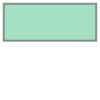

In [22]:
calakmul['geometry'][0]  # Plot GeoDataFrame

#### Defining the vdims below will allow you to hover over specific shots and view information about them.

In [23]:
# Create a list of geodataframe columns to be included as attributes in the output map
vdims = []
for f in latslons:
    if f not in ['geometry']:
        vdims.append(f)
vdims

['Beam', 'Shot Number', 'Quality Flag']

#### Below, combine a plot of the Redwood National Park Boundary (combine two `geoviews` plots using `*`) with the point visual mapping function defined above in order to plot (1) the representative GEDI shots, (2) the region of interest, and (3) a basemap layer. 

In [24]:
# Call the function for plotting the GEDI points
gv.Polygons(calakmul['geometry']).opts(line_color='red', color=None) * pointVisual(latslons, vdims = vdims)

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]   (Beam,Shot Number,Quality Flag)

#### Each GEDI shot has a unique shot identifier (shot number) that is available within each data group of the product. The shot number is important to retain in any data subsetting as it will allow the user to link any shot record back to the original orbit data, and to link any shot and its data between the L1 and L2 products. The standard format  for GEDI Shots is as follows:


# 5. Work with GEDI L2B Data <a id="L2B"></a>
#### The L2B product contains biophysical information derived from the geolocated GEDI return waveforms including total and vertical profiles of canopy cover and Plant Area Index (PAI), the vertical Plant Area Volume Density (PAVD) profile, and Foliage Height Diversity (FHD).
#### Detailed product information can be found on the [GEDI L2B Product Page](https://doi.org/10.5067/GEDI/GEDI02_B.002).

#### Below, only data for one shot is extracted. 

In [26]:
beamNames[4]

'BEAM0101'

In [27]:
beamSDS = [g for g in gediSDS if beamNames[4] in g]  # Subset to a single beam
len(beamSDS)

197

#### In the GEDI L2B product, Canopy Height is stored in units (cm), so below convert to meters.

In [29]:
canopyHeight = canopyHeight / 100  # Convert RH100 from cm to m 

#### Below, notice the reformatted PAVD layer, which should now fit into the dataframe created below.

In [33]:
# Take the DEM, GEDI-produced Elevation, and Canopy height and add to a Pandas dataframe
transectDF = pd.DataFrame({
    'Shot Index': shotIndex,
    'Shot Number': shotNums,
    'Latitude': zLat,
    'Longitude': zLon,
    'Tandem-X DEM': dem,
    'Elevation (m)': zElevation,
    'Canopy Elevation (m)': zHigh,
    'Canopy Height (rh100)': canopyHeight,
    'Quality Flag': quality,
    'Degrade Flag': degrade, 
    'Sensitivity': sensitivity,
    'Selected L2A Algorithm': selectedAlgorithmL2A
    })

ValueError: All arrays must be of the same length

In [ ]:
transectDF